# Problem Statement

There are several banks, which gives loan to the customers for E-Bike purchase.

One such bank is facing profit challenges due to escalating incidences of non-payment in their E-Bike financing division. The firm's objective is to ascertain the loan reimbursement capabilities of their clients and comprehend the relative significance of each factor that contributes to a borrower's propensity to honor the loan repayment.

Objective:

The aim of the problem is to foresee whether a client will fail to honor their loan repayment obligation or not. For each identifier in the attached dataset (refer column "ID"), the task is to predict the "Non-Payment" risk level. Suggest the optimal Credit Risk Model by using the attached dataset. Feel free to give any proxy indicator/ any analysis which can guide bank to findout potential Loan Defaulter. Define the objective function (Evaluation Metric) for Model based on your own intuition.

Data:
Column ID as an Identifier
Column "Default" as Y variable
Rest of the columns as X Variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Dataset

df = pd.read_excel("Base_Problem_DataSet.xlsb",na_values = ['XNA',"NA","$","#","@","&"])
df

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,...,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Service,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,...,Yes,Yes,NaN,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.0,NaN,1.0,0.0,107820.00,3165.3,Service,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750.0,0.0,1.0,1.0,0.0,0.0,104256.00,3388.05,Commercial,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100.0,0.0,1.0,0.0,1.0,1.0,55107.90,2989.35,Govt Job,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250.0,1.0,1.0,0.0,1.0,0.0,45000.00,2719.35,Service,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [3]:
# Getting information abt the dataset like Datypes, total values etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   ID                                          121856 non-null  int64  
 1   Patron_Salary                               118234 non-null  float64
 2   Automobile_Possession                       118275 non-null  float64
 3   Two-Wheeler_Ownership                       118232 non-null  float64
 4   Ongoing_Borrowing                           118221 non-null  float64
 5   Residence_Proprietorship                    118195 non-null  float64
 6   Offspring_Number                            118218 non-null  float64
 7   Loan_Capital                                118219 non-null  float64
 8   Borrowing_Periodic_Payment                  117043 non-null  object 
 9   Customer_Revenue_Category                   118155 non-null  object 
 

In [4]:
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Then, you can call df.head() to see all columns
df.head()

,ID,Patron_Salary,Automobile_Possession,Two-Wheeler_Ownership,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Elderliness_in_Days,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Private_Dwelling_Duration,Cellphone_Marker,Residential_Phone_Marker,Employment_Phone_Operation,Customer_Vocation,Patron_Kin_Count,Customer_Urban_Area_Ranking,Request_Submission_Day,Request_Submission_Hour,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Solvency_Information_Agency,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Service,Graduation dropout,W,Male,CL,Family,0.022800,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,NaN,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [5]:
# Checking the availability of Null values in our DF

df.isnull().sum()

ID                                                0
Patron_Salary                                  3622
Automobile_Possession                          3581
Two-Wheeler_Ownership                          3624
Ongoing_Borrowing                              3635
Residence_Proprietorship                       3661
Offspring_Number                               3638
Loan_Capital                                   3637
Borrowing_Periodic_Payment                     4813
Customer_Revenue_Category                      3701
Patron_Academic_Qualification                  3645
Customer_Conjugal_State                        3473
Patron_Sex                                     2416
Borrowing_Agreement_Category                   3651
Customer_Living_Arrangement                    3687
Population_Fraction_by_Region                  4868
Elderliness_in_Days                            3600
Work_Duration_in_Days                          3649
Enlistment_Period_in_Days                      3614
Identity_Age

In [6]:
# Distribution of Default and non default cases 
# 0 = Non default , 1 = Default

df.Default.value_counts()

Default
0    112011
1      9845
Name: count, dtype: int64

In [7]:
# Since Private_Dwelling_Duration has the highest number of defaults , checking the correlation with our target

df.Default.corr(df.Private_Dwelling_Duration)

0.04751341801832764

In [8]:
df.columns

Index(['ID', 'Patron_Salary', 'Automobile_Possession', 'Two-Wheeler_Ownership',
       'Ongoing_Borrowing', 'Residence_Proprietorship', 'Offspring_Number',
       'Loan_Capital', 'Borrowing_Periodic_Payment',
       'Customer_Revenue_Category', 'Patron_Academic_Qualification',
       'Customer_Conjugal_State', 'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days',
       'Private_Dwelling_Duration', 'Cellphone_Marker',
       'Residential_Phone_Marker', 'Employment_Phone_Operation',
       'Customer_Vocation', 'Patron_Kin_Count', 'Customer_Urban_Area_Ranking',
       'Request_Submission_Day', 'Request_Submission_Hour',
       'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_1', 'Rating_Origin_2', 'Rating_Origin_3',
       '

In [9]:
# finding the percentage of null values in each column 

(df.isnull().sum()/len(df)) * 100

ID                                             0.000000
Patron_Salary                                  2.972361
Automobile_Possession                          2.938715
Two-Wheeler_Ownership                          2.974002
Ongoing_Borrowing                              2.983029
Residence_Proprietorship                       3.004366
Offspring_Number                               2.985491
Loan_Capital                                   2.984670
Borrowing_Periodic_Payment                     3.949744
Customer_Revenue_Category                      3.037191
Patron_Academic_Qualification                  2.991236
Customer_Conjugal_State                        2.850085
Patron_Sex                                     1.982668
Borrowing_Agreement_Category                   2.996159
Customer_Living_Arrangement                    3.025702
Population_Fraction_by_Region                  3.994879
Elderliness_in_Days                            2.954307
Work_Duration_in_Days                          2

In [10]:
print("PVT Dwelling corr")
print(df["Private_Dwelling_Duration"].corr(df["Default"]))


PVT Dwelling corr
0.04751341801832765


In [11]:
# According to the correlation and my domain knowledge I found this column is not relevant for us

df = df.drop("Private_Dwelling_Duration",axis = 1)

In [12]:
df.isnull().sum()

ID                                                0
Patron_Salary                                  3622
Automobile_Possession                          3581
Two-Wheeler_Ownership                          3624
Ongoing_Borrowing                              3635
Residence_Proprietorship                       3661
Offspring_Number                               3638
Loan_Capital                                   3637
Borrowing_Periodic_Payment                     4813
Customer_Revenue_Category                      3701
Patron_Academic_Qualification                  3645
Customer_Conjugal_State                        3473
Patron_Sex                                     2416
Borrowing_Agreement_Category                   3651
Customer_Living_Arrangement                    3687
Population_Fraction_by_Region                  4868
Elderliness_in_Days                            3600
Work_Duration_in_Days                          3649
Enlistment_Period_in_Days                      3614
Identity_Age

In [13]:
(df.isnull().sum()/len(df)) * 100

ID                                             0.000000
Patron_Salary                                  2.972361
Automobile_Possession                          2.938715
Two-Wheeler_Ownership                          2.974002
Ongoing_Borrowing                              2.983029
Residence_Proprietorship                       3.004366
Offspring_Number                               2.985491
Loan_Capital                                   2.984670
Borrowing_Periodic_Payment                     3.949744
Customer_Revenue_Category                      3.037191
Patron_Academic_Qualification                  2.991236
Customer_Conjugal_State                        2.850085
Patron_Sex                                     1.982668
Borrowing_Agreement_Category                   2.996159
Customer_Living_Arrangement                    3.025702
Population_Fraction_by_Region                  3.994879
Elderliness_in_Days                            2.954307
Work_Duration_in_Days                          2

In [14]:
# Getting the value counts for each columns using a for loop


for i in df.columns:
    if i != 'ID':
        a = df[i].value_counts()
        b = {i:a}
        print(b)

{'Patron_Salary': Patron_Salary
13500.00    13717
11250.00    11940
15750.00    10146
18000.00     9514
9000.00      8705
            ...  
19379.25        1
13441.95        1
17595.00        1
59400.00        1
12840.75        1
Name: count, Length: 1216, dtype: int64}
{'Automobile_Possession': Automobile_Possession
0.0    77724
1.0    40551
Name: count, dtype: int64}
{'Two-Wheeler_Ownership': Two-Wheeler_Ownership
0.0    78948
1.0    39284
Name: count, dtype: int64}
{'Ongoing_Borrowing': Ongoing_Borrowing
0.0    59208
1.0    59013
Name: count, dtype: int64}
{'Residence_Proprietorship': Residence_Proprietorship
1.0    81798
0.0    36397
Name: count, dtype: int64}
{'Offspring_Number': Offspring_Number
0.0     82834
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: count, dtype: int64}
{'Loan_Capital': Loan_Capital
45000.00     3733
67500.00     3450


In [15]:
df.Patron_Salary.value_counts()

Patron_Salary
13500.00    13717
11250.00    11940
15750.00    10146
18000.00     9514
9000.00      8705
            ...  
19379.25        1
13441.95        1
17595.00        1
59400.00        1
12840.75        1
Name: count, Length: 1216, dtype: int64

In [16]:
# Getting all the value details ffrom value_counts function

unique_values = df['Patron_Salary'].value_counts().reset_index()
unique_values.columns = ['Patron_Salary', 'Count']
unique_values = unique_values.sort_values(by='Patron_Salary')

# Display the DataFrame with all unique values and counts
unique_values


,Patron_Salary,Count
1098,2565.00,1
1137,2610.00,1
1108,2646.00,1
106,2700.00,25
257,2790.00,5
...,...,...
976,382500.00,1
682,395005.95,1
329,450000.00,3
747,675000.00,1


In [17]:
# changing the dtype of the column to numeric

df["Patron_Salary"] = pd.to_numeric(df["Patron_Salary"],errors = 'coerce')

In [18]:
df["Patron_Salary"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121856 entries, 0 to 121855
Series name: Patron_Salary
Non-Null Count   Dtype  
--------------   -----  
118234 non-null  float64
dtypes: float64(1)
memory usage: 952.1 KB


In [19]:
# df["Sort_of_Institution"].corr(df["Default"])

In [20]:
# Dropping the less relevant column based on domain understanding

df.drop(["Solvency_Information_Agency",'Residential_Phone_Marker','Two-Wheeler_Ownership','Residential_Phone_Marker','Patron_Kin_Count','Request_Submission_Day','Request_Submission_Hour'],axis=1,inplace = True)

In [21]:
# Checking the list of columns post drop

df.columns

Index(['ID', 'Patron_Salary', 'Automobile_Possession', 'Ongoing_Borrowing',
       'Residence_Proprietorship', 'Offspring_Number', 'Loan_Capital',
       'Borrowing_Periodic_Payment', 'Customer_Revenue_Category',
       'Patron_Academic_Qualification', 'Customer_Conjugal_State',
       'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Elderliness_in_Days', 'Work_Duration_in_Days',
       'Enlistment_Period_in_Days', 'Identity_Age_in_Days', 'Cellphone_Marker',
       'Employment_Phone_Operation', 'Customer_Vocation',
       'Customer_Urban_Area_Ranking', 'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_1', 'Rating_Origin_2', 'Rating_Origin_3',
       'Community_Non-Payment_Incidence', 'Telecommunication_Switch',
       'Default'],
      dtype='object')

In [22]:
# chelking null values again

df.isnull().sum()

ID                                                0
Patron_Salary                                  3622
Automobile_Possession                          3581
Ongoing_Borrowing                              3635
Residence_Proprietorship                       3661
Offspring_Number                               3638
Loan_Capital                                   3637
Borrowing_Periodic_Payment                     4813
Customer_Revenue_Category                      3701
Patron_Academic_Qualification                  3645
Customer_Conjugal_State                        3473
Patron_Sex                                     2416
Borrowing_Agreement_Category                   3651
Customer_Living_Arrangement                    3687
Population_Fraction_by_Region                  4868
Elderliness_in_Days                            3600
Work_Duration_in_Days                          3649
Enlistment_Period_in_Days                      3614
Identity_Age_in_Days                           5968
Cellphone_Ma

In [23]:
# Converting off spring number to numerical

df["Offspring_Number"] = df["Offspring_Number"].astype(float)

In [24]:
df["Offspring_Number"].isnull().sum()

3638

In [25]:
df["Offspring_Number"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121856 entries, 0 to 121855
Series name: Offspring_Number
Non-Null Count   Dtype  
--------------   -----  
118218 non-null  float64
dtypes: float64(1)
memory usage: 952.1 KB


In [26]:
(df.isnull().sum()/len(df)) * 100

ID                                             0.000000
Patron_Salary                                  2.972361
Automobile_Possession                          2.938715
Ongoing_Borrowing                              2.983029
Residence_Proprietorship                       3.004366
Offspring_Number                               2.985491
Loan_Capital                                   2.984670
Borrowing_Periodic_Payment                     3.949744
Customer_Revenue_Category                      3.037191
Patron_Academic_Qualification                  2.991236
Customer_Conjugal_State                        2.850085
Patron_Sex                                     1.982668
Borrowing_Agreement_Category                   2.996159
Customer_Living_Arrangement                    3.025702
Population_Fraction_by_Region                  3.994879
Elderliness_in_Days                            2.954307
Work_Duration_in_Days                          2.994518
Enlistment_Period_in_Days                      2

<Axes: xlabel='Rating_Origin_1', ylabel='Density'>

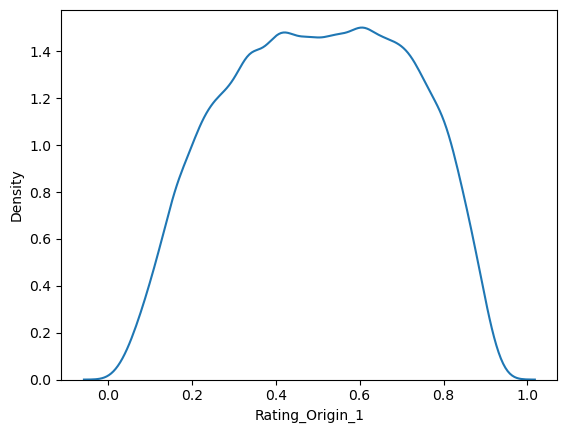

In [27]:
# Plotting to check the distrivution of the column

sns.kdeplot(df["Rating_Origin_1"])

In [28]:
# Replacing the null values by mean 

mean = df["Rating_Origin_1"].mean()

df["Rating_Origin_1"] = df["Rating_Origin_1"].fillna(mean)

In [29]:
df["Rating_Origin_1"].isnull().sum()

0

<Axes: xlabel='Rating_Origin_3', ylabel='Density'>

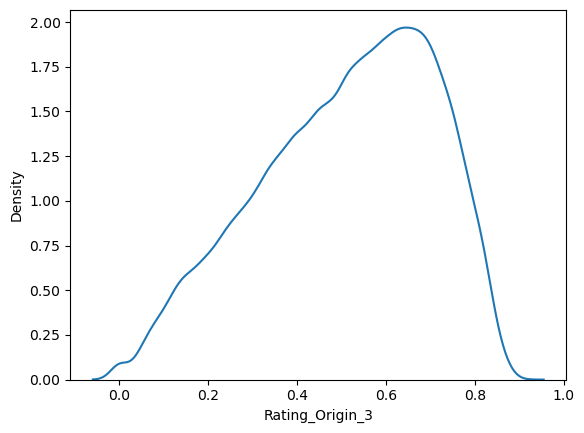

In [30]:
sns.kdeplot(df["Rating_Origin_3"])

In [31]:
median = df["Rating_Origin_3"].median()

df["Rating_Origin_3"] = df["Rating_Origin_3"].fillna(median)

<Axes: xlabel='Community_Non-Payment_Incidence', ylabel='Density'>

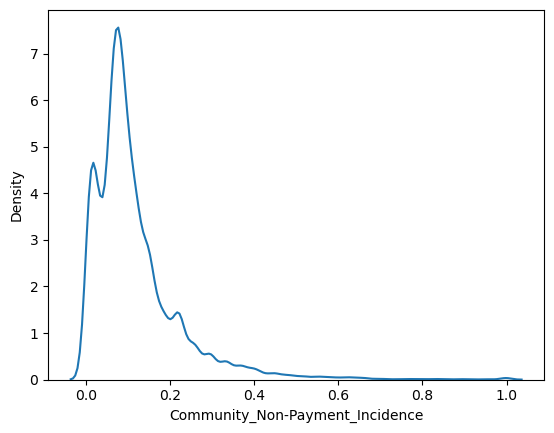

In [32]:
sns.kdeplot(df["Community_Non-Payment_Incidence"])

# Since it is skewed column we will replace the nulls with median instead of mean 

In [33]:
# Replacing nulls 

median = df["Community_Non-Payment_Incidence"].median()

df["Community_Non-Payment_Incidence"]= df["Community_Non-Payment_Incidence"].fillna(median)

df["Community_Non-Payment_Incidence"].isnull().sum()

0

In [34]:
# Replacing null of the column by mode as it is a categorical column

mode = df["Customer_Vocation"].mode()
df["Customer_Vocation"] = df["Customer_Vocation"].fillna(mode)[0]

In [35]:
df["Customer_Vocation"].isnull().sum()

0

In [36]:
df["Customer_Vocation"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121856 entries, 0 to 121855
Series name: Customer_Vocation
Non-Null Count   Dtype 
--------------   ----- 
121856 non-null  object
dtypes: object(1)
memory usage: 952.1+ KB


In [37]:
df["Sort_of_Institution"].value_counts()

Sort_of_Institution
Business Entity Type 3    26279
Self-employed             14725
Other                      6290
Medicine                   4320
Business Entity Type 2     4126
Government                 3971
School                     3371
Trade: type 7              2979
Kindergarten               2686
Construction               2623
Business Entity Type 1     2313
Transport: type 4          2076
Trade: type 3              1338
Security                   1284
Industry: type 9           1280
Industry: type 3           1235
Housing                    1162
Military                   1031
Bank                       1012
Agriculture                1011
Industry: type 11           999
Police                      934
Postal                      834
Transport: type 2           811
Security Ministries         756
Trade: type 2               717
Restaurant                  710
Services                    570
University                  559
Transport: type 3           501
Industry: type 7    

In [38]:
# Creating a new DF with values of Sort_of_Institution columns to do Chi squared testing

chi_df = pd.DataFrame(df["Sort_of_Institution"],df["Default"])
chi_df.reset_index(inplace = True)
chi_df

,Default,Sort_of_Institution
0,0,Self-employed
1,0,Self-employed
2,0,Self-employed
3,0,Self-employed
4,0,Self-employed
...,...,...
121851,1,Government
121852,0,Self-employed
121853,0,Self-employed
121854,0,Self-employed


In [39]:
# replacing the 0  and 1 with no and yes

chi_df["Default"].replace({0:"NO",1:"Yes"},inplace = True)

In [40]:
# performing the CHI square test


import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(chi_df['Sort_of_Institution'], chi_df['Default'])

# Calculate Cramér's V
n = contingency_table.sum().sum()
chi2, _, _, _ = chi2_contingency(contingency_table)
cramer_v = (chi2 / n) ** 0.5

# Assess the strength of association
print(f"Cramér's V: {cramer_v}")


# since the values is almost a perfect value so we will not be doing anything for now


Cramér's V: 0.9999447489510741


In [41]:
# feeling nulls with mode

mode = df["Sort_of_Institution"].mode()
df["Sort_of_Institution"] = df["Sort_of_Institution"].fillna(mode)[0]

In [42]:
# Converting to numerical

df["Elderliness_in_Days"] = pd.to_numeric(df["Elderliness_in_Days"],errors = 'coerce') 

In [43]:
# Converting the values in years for age

df["Elderliness_in_Days"] = round(df["Elderliness_in_Days"]/365,0)

In [44]:
# Renaming the column to age
df.rename(columns = {"Elderliness_in_Days":"Patron_age"},inplace = True)

In [45]:
# replacing null in one go for all cols as the null values are very low

for i in df.columns:
    if df[i].dtype!='object':
        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [46]:
df.isnull().sum()

ID                                            0
Patron_Salary                                 0
Automobile_Possession                         0
Ongoing_Borrowing                             0
Residence_Proprietorship                      0
Offspring_Number                              0
Loan_Capital                                  0
Borrowing_Periodic_Payment                    0
Customer_Revenue_Category                     0
Patron_Academic_Qualification                 0
Customer_Conjugal_State                       0
Patron_Sex                                    0
Borrowing_Agreement_Category                  0
Customer_Living_Arrangement                   0
Population_Fraction_by_Region                 0
Patron_age                                    0
Work_Duration_in_Days                         0
Enlistment_Period_in_Days                     0
Identity_Age_in_Days                          0
Cellphone_Marker                              0
Employment_Phone_Operation              

In [47]:
df

,ID,Patron_Salary,Automobile_Possession,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Patron_age,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Employment_Phone_Operation,Customer_Vocation,Customer_Urban_Area_Ranking,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Default
0,12142509,6750.0,0.0,1.000000,0.00000,0.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,38.0,1062,6123,383,1,0,Sales,2.0,Yes,Yes,Self-employed,0.568066,0.478787,0.537070,0.0186,63.000000,0
1,12138936,20250.0,1.0,1.000000,0.69206,0.0,15282.00,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,39.0,4129,7833,21,1,1,Sales,2.0,Yes,Yes,Self-employed,0.563360,0.215068,0.537070,0.0887,962.106056,0
2,12181264,18000.0,0.0,1.000000,0.00000,1.0,59527.35,2788.2,Service,Graduation dropout,W,Male,CL,Family,0.022800,46.0,5102,1,331,1,0,Sales,2.0,Yes,Yes,Self-employed,0.501213,0.552795,0.329655,0.0742,277.000000,0
3,12188929,15750.0,0.0,1.000000,1.00000,0.0,53870.40,2295.45,Retired,Secondary,M,Male,CL,Home,0.010556,64.0,365243,1,775,1,0,Sales,3.0,Yes,Yes,Self-employed,0.501213,0.135182,0.631355,0.0887,1700.000000,0
4,12133385,33750.0,1.0,1.000000,0.00000,2.0,133988.40,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,31.0,2977,5516,4043,1,0,Sales,1.0,Yes,Yes,Self-employed,0.508199,0.301182,0.355639,0.2021,674.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.499175,1.00000,0.0,107820.00,3165.3,Service,Secondary,M,Female,CL,Home,0.031329,35.0,2863,2661,2943,1,0,Sales,2.0,Yes,No,Self-employed,0.501213,0.173527,0.184116,0.0577,0.000000,1
121852,12173765,15750.0,0.0,1.000000,0.00000,0.0,104256.00,3388.05,Commercial,Graduation,M,Female,CL,Home,0.018209,24.0,636,902,1209,1,0,Sales,3.0,Yes,Yes,Self-employed,0.501213,0.371559,0.406617,0.0825,4.000000,0
121853,12103937,8100.0,0.0,0.000000,1.00000,1.0,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,Home,0.008068,25.0,1623,3980,353,1,0,Sales,3.0,No,No,Self-employed,0.169049,0.048079,0.537070,0.0887,0.000000,0
121854,12170623,38250.0,1.0,0.000000,1.00000,0.0,45000.00,2719.35,Service,Graduation,M,Female,CL,Home,0.028663,28.0,847,895,2902,1,0,Sales,2.0,Yes,Yes,Self-employed,0.182737,0.103538,0.077499,0.0979,0.000000,0


In [48]:
df["Borrowing_Periodic_Payment"] = pd.to_numeric(df["Borrowing_Periodic_Payment"],errors = 'coerce')

In [49]:
# cHEKING FOR OUTLIERS

## # Create a figure with subplots
# fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))


# # Create box plots for each feature
# for i, feature in enumerate(numeric_columns_names):
#     row, col = i // 4, i % 4
#     sns.boxplot(x=df[feature], ax=axes[row, col])
#     axes[row, col].set_title(f'Box Plot of {feature}')

# # Adjust the layout
# plt.tight_layout()
# plt.show()

In [50]:
# q1 = df["Patron_Salary"].quantile(0.25)
# q3 = df["Patron_Salary"].quantile(0.75)

# IQR = q3-q1

# lower = q1-1.5*IQR
# upper = q3+1.5*IQR

In [51]:
numeric_columns_names = df.select_dtypes(include=['int', 'float']).columns


In [52]:
#  Calculating IQR and lower upper for each and every column in df
# numeric_columns_names = numeric_columns.columns

lower_thresholds = {}
upper_thresholds = {}

for i in numeric_columns_names:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3-q1

    lower = q1-1.5*IQR
    upper = q3+1.5*IQR
    
    lower_thresholds[i] = lower
    upper_thresholds[i] = upper
    
print("Lower Thresholds:")
print(lower_thresholds)
print("\nUpper Thresholds:")
print(upper_thresholds)

Lower Thresholds:
{'ID': 12039073.5, 'Patron_Salary': -2250.0, 'Automobile_Possession': -1.5, 'Ongoing_Borrowing': -1.5, 'Residence_Proprietorship': -1.5, 'Offspring_Number': -1.5, 'Loan_Capital': -52672.5, 'Borrowing_Periodic_Payment': -1206.0000000000005, 'Population_Fraction_by_Region': -0.014508, 'Patron_age': 4.0, 'Cellphone_Marker': 1.0, 'Employment_Phone_Operation': -1.5, 'Customer_Urban_Area_Ranking': 2.0, 'Rating_Origin_1': 0.5012129250527902, 'Rating_Origin_2': 0.015246377875000106, 'Rating_Origin_3': 0.11329397199999997, 'Community_Non-Payment_Incidence': 0.0887, 'Telecommunication_Switch': -1607.5, 'Default': 0.0}

Upper Thresholds:
{'ID': 12282783.5, 'Patron_Salary': 33750.0, 'Automobile_Possession': 2.5, 'Ongoing_Borrowing': 2.5, 'Residence_Proprietorship': 2.5, 'Offspring_Number': 2.5, 'Loan_Capital': 160987.5, 'Borrowing_Periodic_Payment': 6177.6, 'Population_Fraction_by_Region': 0.050932, 'Patron_age': 84.0, 'Cellphone_Marker': 1.0, 'Employment_Phone_Operation': 2.5, '

In [53]:
# identified from value_counts() that 365243 is repeated 24000+ times which sums to more than 1000 years which is impossible ,
# it means it is an error so we will convert it to Null and then replace with median as it is most suitable option as
# mean value is also relatively high

df["Work_Duration_in_Days"] = df["Work_Duration_in_Days"].replace(365243,np.nan)
df["Work_Duration_in_Days"] = pd.to_numeric(df["Work_Duration_in_Days"],errors = 'coerce')
median=  df["Work_Duration_in_Days"].median()
df["Work_Duration_in_Days"].fillna(median,inplace = True)
df["Work_Duration_in_Days"].value_counts()

Work_Duration_in_Days
1649.0     24788
381.0         69
212.0         66
230.0         64
231.0         61
           ...  
13323.0        1
10294.0        1
11616.0        1
9727.0         1
11796.0        1
Name: count, Length: 9948, dtype: int64

<Axes: >

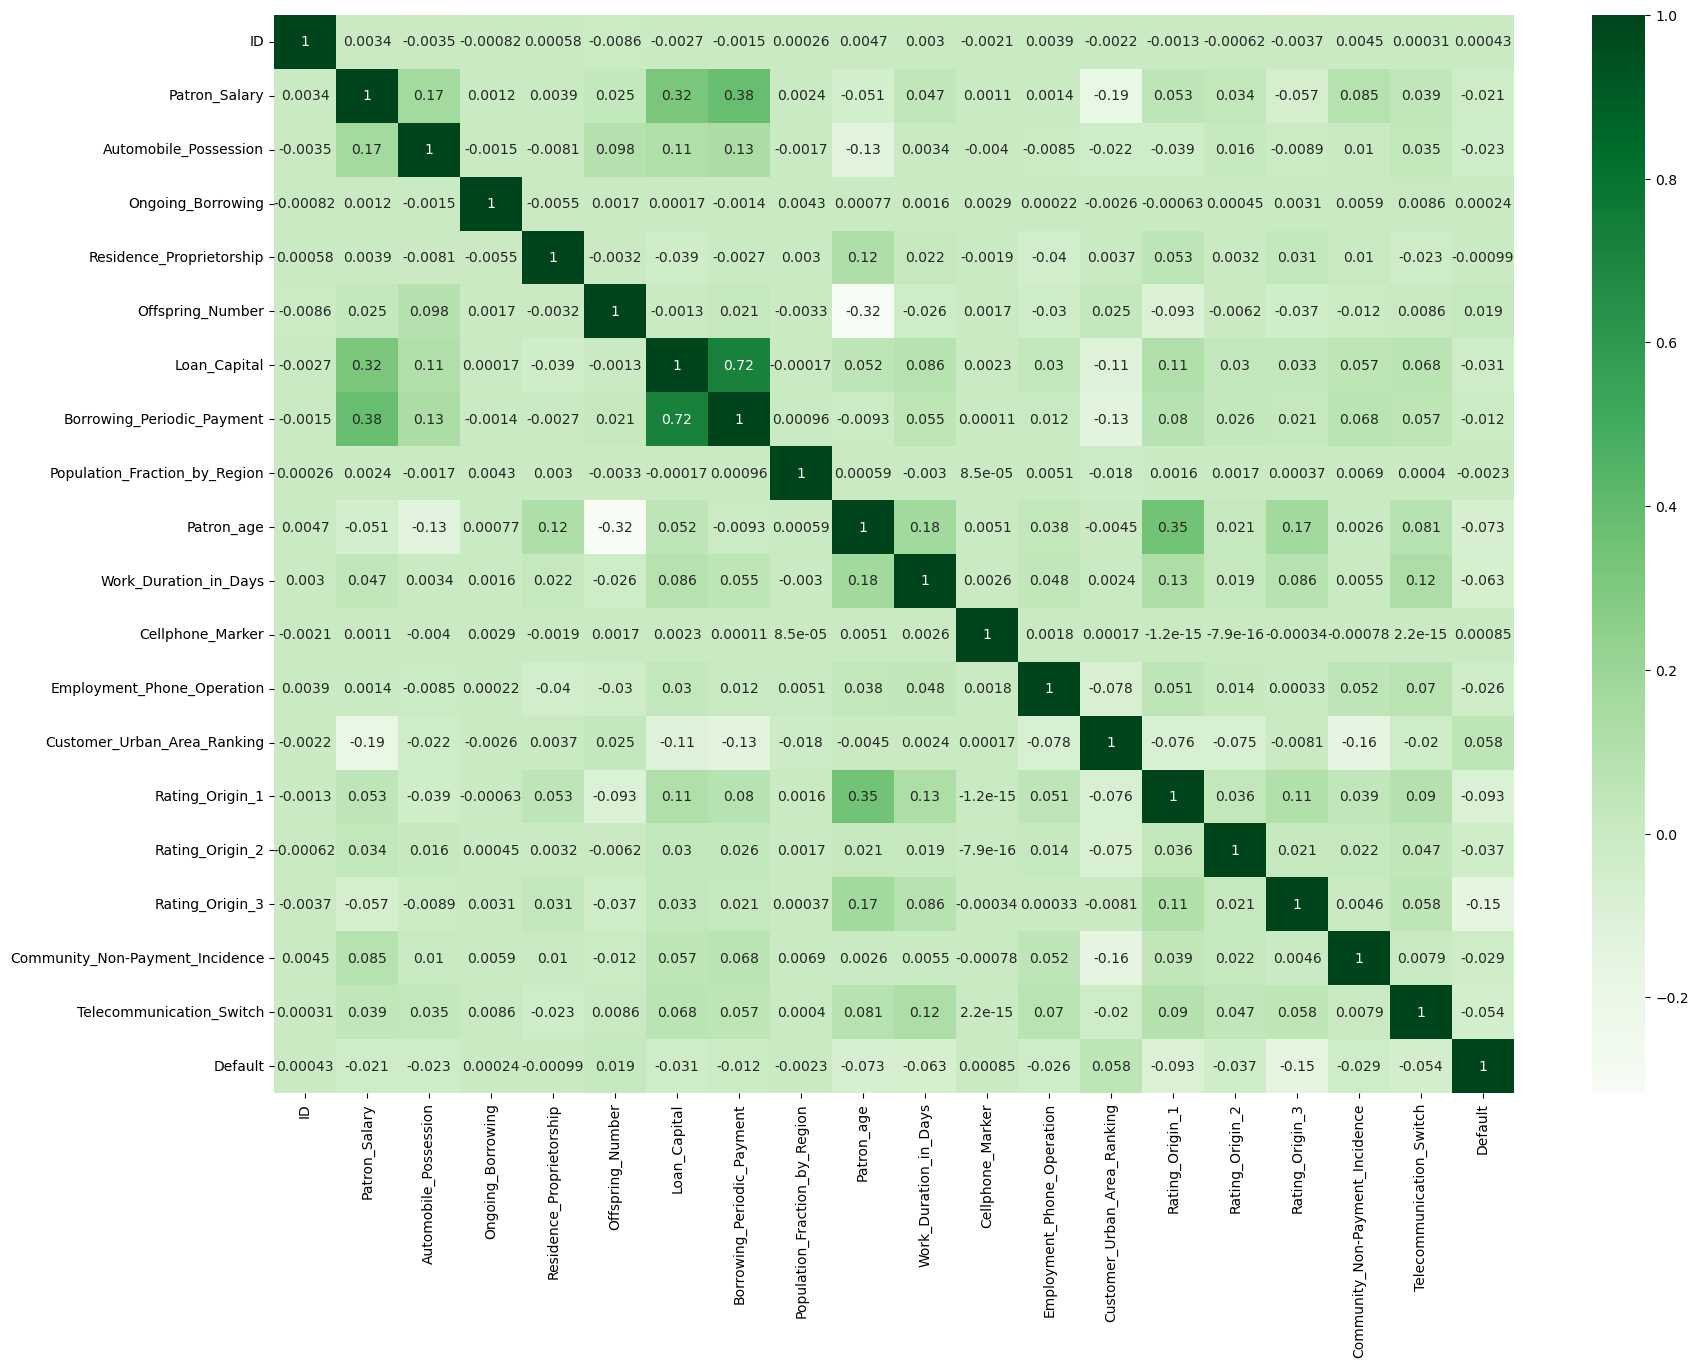

In [54]:
corrdf = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(20,14))
sns.heatmap(corrdf.corr(),annot = True ,cmap = 'Greens')

In [55]:
df.columns

Index(['ID', 'Patron_Salary', 'Automobile_Possession', 'Ongoing_Borrowing',
       'Residence_Proprietorship', 'Offspring_Number', 'Loan_Capital',
       'Borrowing_Periodic_Payment', 'Customer_Revenue_Category',
       'Patron_Academic_Qualification', 'Customer_Conjugal_State',
       'Patron_Sex', 'Borrowing_Agreement_Category',
       'Customer_Living_Arrangement', 'Population_Fraction_by_Region',
       'Patron_age', 'Work_Duration_in_Days', 'Enlistment_Period_in_Days',
       'Identity_Age_in_Days', 'Cellphone_Marker',
       'Employment_Phone_Operation', 'Customer_Vocation',
       'Customer_Urban_Area_Ranking', 'Patron_Constant_Correspondence_Marker',
       'Customer_Professional_Communication_Marker', 'Sort_of_Institution',
       'Rating_Origin_1', 'Rating_Origin_2', 'Rating_Origin_3',
       'Community_Non-Payment_Incidence', 'Telecommunication_Switch',
       'Default'],
      dtype='object')

In [56]:
df.isnull().sum()

ID                                             0
Patron_Salary                                  0
Automobile_Possession                          0
Ongoing_Borrowing                              0
Residence_Proprietorship                       0
Offspring_Number                               0
Loan_Capital                                   0
Borrowing_Periodic_Payment                    13
Customer_Revenue_Category                      0
Patron_Academic_Qualification                  0
Customer_Conjugal_State                        0
Patron_Sex                                     0
Borrowing_Agreement_Category                   0
Customer_Living_Arrangement                    0
Population_Fraction_by_Region                  0
Patron_age                                     0
Work_Duration_in_Days                          0
Enlistment_Period_in_Days                      0
Identity_Age_in_Days                           0
Cellphone_Marker                               0
Employment_Phone_Ope

In [57]:
# replacing nulls

df["Borrowing_Periodic_Payment"].replace(df["Borrowing_Periodic_Payment"].median(),inplace=True)

In [58]:
df["Borrowing_Periodic_Payment"].value_counts()

Borrowing_Periodic_Payment
900.00     7185
1350.00    2091
675.00      845
1012.50     774
3780.00     621
           ... 
5323.50       1
2140.20       1
5581.80       1
2597.40       1
2989.35       1
Name: count, Length: 10855, dtype: int64

In [59]:
# dropping rest nulls

df.dropna(inplace=True)
df

,ID,Patron_Salary,Automobile_Possession,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Customer_Conjugal_State,Patron_Sex,Borrowing_Agreement_Category,Customer_Living_Arrangement,Population_Fraction_by_Region,Patron_age,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Employment_Phone_Operation,Customer_Vocation,Customer_Urban_Area_Ranking,Patron_Constant_Correspondence_Marker,Customer_Professional_Communication_Marker,Sort_of_Institution,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Default
0,12142509,6750.0,0.0,1.000000,0.00000,0.0,61190.55,3416.85,Commercial,Secondary,M,Male,CL,Home,0.028663,38.0,1062.0,6123,383,1,0,Sales,2.0,Yes,Yes,Self-employed,0.568066,0.478787,0.537070,0.0186,63.000000,0
1,12138936,20250.0,1.0,1.000000,0.69206,0.0,15282.00,1826.55,Service,Graduation,M,Male,CL,Home,0.008575,39.0,4129.0,7833,21,1,1,Sales,2.0,Yes,Yes,Self-employed,0.563360,0.215068,0.537070,0.0887,962.106056,0
2,12181264,18000.0,0.0,1.000000,0.00000,1.0,59527.35,2788.20,Service,Graduation dropout,W,Male,CL,Family,0.022800,46.0,5102.0,1,331,1,0,Sales,2.0,Yes,Yes,Self-employed,0.501213,0.552795,0.329655,0.0742,277.000000,0
3,12188929,15750.0,0.0,1.000000,1.00000,0.0,53870.40,2295.45,Retired,Secondary,M,Male,CL,Home,0.010556,64.0,1649.0,1,775,1,0,Sales,3.0,Yes,Yes,Self-employed,0.501213,0.135182,0.631355,0.0887,1700.000000,0
4,12133385,33750.0,1.0,1.000000,0.00000,2.0,133988.40,3547.35,Commercial,Secondary,M,Female,CL,Home,0.020713,31.0,2977.0,5516,4043,1,0,Sales,1.0,Yes,Yes,Self-employed,0.508199,0.301182,0.355639,0.2021,674.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.499175,1.00000,0.0,107820.00,3165.30,Service,Secondary,M,Female,CL,Home,0.031329,35.0,2863.0,2661,2943,1,0,Sales,2.0,Yes,No,Self-employed,0.501213,0.173527,0.184116,0.0577,0.000000,1
121852,12173765,15750.0,0.0,1.000000,0.00000,0.0,104256.00,3388.05,Commercial,Graduation,M,Female,CL,Home,0.018209,24.0,636.0,902,1209,1,0,Sales,3.0,Yes,Yes,Self-employed,0.501213,0.371559,0.406617,0.0825,4.000000,0
121853,12103937,8100.0,0.0,0.000000,1.00000,1.0,55107.90,2989.35,Govt Job,Secondary,M,Male,CL,Home,0.008068,25.0,1623.0,3980,353,1,0,Sales,3.0,No,No,Self-employed,0.169049,0.048079,0.537070,0.0887,0.000000,0
121854,12170623,38250.0,1.0,0.000000,1.00000,0.0,45000.00,2719.35,Service,Graduation,M,Female,CL,Home,0.028663,28.0,847.0,895,2902,1,0,Sales,2.0,Yes,Yes,Self-employed,0.182737,0.103538,0.077499,0.0979,0.000000,0


In [60]:
# Fore feature selection of categorcal variable I am creating a fucntion to calculate information values (IV) score for 
# determining the predictive capacity of the  


df_new=pd.DataFrame(columns=['Feature','IV-Score'])
col_list = list(df.columns)

# Example function to calculate IV for a single column
def calculate_iv(df, feature, target):
    # Create a cross-tabulation between the feature and the target
    crosstab = pd.crosstab(df[feature], df[target])
    
    # Calculate the Proportion of Good and Proportion of Bad
    crosstab['Proportion_Good'] = crosstab[0] / crosstab[0].sum()
    crosstab['Proportion_Bad'] = crosstab[1] / crosstab[1].sum()
    
    # Calculate WoE (Weight of Evidence)
    crosstab['WoE'] = np.log(crosstab['Proportion_Bad'] / crosstab['Proportion_Good'])
    
    # Calculate IV (Information Value)
    iv = ((crosstab['Proportion_Bad'] - crosstab['Proportion_Good']) * crosstab['WoE']).sum()
    
    return iv



# Create a list of DataFrames to store IV scores for each feature
iv_dfs = []

# Calculate IV for each feature (excluding the 'Default' column)
for col in df.columns:
    if col == 'Default':
        continue
    elif df[col].dtype == 'object':
        
        iv = calculate_iv(df, col, 'Default')
        iv_df = pd.DataFrame({'Feature': [col], 'IV-Score': [iv]})
        iv_dfs.append(iv_df)

# Concatenate the list of DataFrames into a single DataFrame
iv_df = pd.concat(iv_dfs, ignore_index=True)

# Display the DataFrame with IV scores
iv_df.sort_values(by = "IV-Score")

C:\Users\91945\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\91945\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\91945\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Feature,IV-Score
8,Customer_Vocation,0.000000
11,Sort_of_Institution,0.000000
2,Customer_Conjugal_State,0.009412
10,Customer_Professional_Communication_Marker,0.009913
4,Borrowing_Agreement_Category,0.011422
5,Customer_Living_Arrangement,0.013986
9,Patron_Constant_Correspondence_Marker,0.020537
3,Patron_Sex,0.032996
1,Patron_Academic_Qualification,0.060311
0,Customer_Revenue_Category,inf


In [61]:
# Dropping the columns based on IV Score

df.drop(["Sort_of_Institution","Customer_Conjugal_State","Customer_Professional_Communication_Marker","Borrowing_Agreement_Category"],axis=1,inplace=True)

In [62]:
df

,ID,Patron_Salary,Automobile_Possession,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Patron_Sex,Customer_Living_Arrangement,Population_Fraction_by_Region,Patron_age,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Employment_Phone_Operation,Customer_Vocation,Customer_Urban_Area_Ranking,Patron_Constant_Correspondence_Marker,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Default
0,12142509,6750.0,0.0,1.000000,0.00000,0.0,61190.55,3416.85,Commercial,Secondary,Male,Home,0.028663,38.0,1062.0,6123,383,1,0,Sales,2.0,Yes,0.568066,0.478787,0.537070,0.0186,63.000000,0
1,12138936,20250.0,1.0,1.000000,0.69206,0.0,15282.00,1826.55,Service,Graduation,Male,Home,0.008575,39.0,4129.0,7833,21,1,1,Sales,2.0,Yes,0.563360,0.215068,0.537070,0.0887,962.106056,0
2,12181264,18000.0,0.0,1.000000,0.00000,1.0,59527.35,2788.20,Service,Graduation dropout,Male,Family,0.022800,46.0,5102.0,1,331,1,0,Sales,2.0,Yes,0.501213,0.552795,0.329655,0.0742,277.000000,0
3,12188929,15750.0,0.0,1.000000,1.00000,0.0,53870.40,2295.45,Retired,Secondary,Male,Home,0.010556,64.0,1649.0,1,775,1,0,Sales,3.0,Yes,0.501213,0.135182,0.631355,0.0887,1700.000000,0
4,12133385,33750.0,1.0,1.000000,0.00000,2.0,133988.40,3547.35,Commercial,Secondary,Female,Home,0.020713,31.0,2977.0,5516,4043,1,0,Sales,1.0,Yes,0.508199,0.301182,0.355639,0.2021,674.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.499175,1.00000,0.0,107820.00,3165.30,Service,Secondary,Female,Home,0.031329,35.0,2863.0,2661,2943,1,0,Sales,2.0,Yes,0.501213,0.173527,0.184116,0.0577,0.000000,1
121852,12173765,15750.0,0.0,1.000000,0.00000,0.0,104256.00,3388.05,Commercial,Graduation,Female,Home,0.018209,24.0,636.0,902,1209,1,0,Sales,3.0,Yes,0.501213,0.371559,0.406617,0.0825,4.000000,0
121853,12103937,8100.0,0.0,0.000000,1.00000,1.0,55107.90,2989.35,Govt Job,Secondary,Male,Home,0.008068,25.0,1623.0,3980,353,1,0,Sales,3.0,No,0.169049,0.048079,0.537070,0.0887,0.000000,0
121854,12170623,38250.0,1.0,0.000000,1.00000,0.0,45000.00,2719.35,Service,Graduation,Female,Home,0.028663,28.0,847.0,895,2902,1,0,Sales,2.0,Yes,0.182737,0.103538,0.077499,0.0979,0.000000,0


In [63]:
# Checking the columns which have both numeric and object values 


object_columns = df.select_dtypes(include=['object'])

# Check for mixed data types within object columns
for column in object_columns.columns:
    mixed_data = df[column][pd.to_numeric(df[column], errors='coerce').isna()]
    if not mixed_data.empty:
        print(f"Column '{column}' has mixed data types.")


Column 'Customer_Revenue_Category' has mixed data types.
Column 'Patron_Academic_Qualification' has mixed data types.
Column 'Patron_Sex' has mixed data types.
Column 'Customer_Living_Arrangement' has mixed data types.
Column 'Enlistment_Period_in_Days' has mixed data types.
Column 'Identity_Age_in_Days' has mixed data types.
Column 'Customer_Vocation' has mixed data types.
Column 'Patron_Constant_Correspondence_Marker' has mixed data types.


In [64]:
# Converting all the Mix datatypes columns

df["Work_Duration_in_Days"] = pd.to_numeric(df["Work_Duration_in_Days"],errors = 'coerce')
df["Enlistment_Period_in_Days"] = pd.to_numeric(df["Enlistment_Period_in_Days"],errors = 'coerce')
df["Identity_Age_in_Days"] = pd.to_numeric(df["Identity_Age_in_Days"],errors = 'coerce')
df["Customer_Vocation"] = pd.to_numeric(df["Customer_Vocation"],errors = 'coerce')
df["Patron_Constant_Correspondence_Marker"] = pd.to_numeric(df["Patron_Constant_Correspondence_Marker"],errors = 'coerce')

In [65]:
# Converting the object values to numeric via label Encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = labelencoder.fit_transform(df[i])
        
df
        

,ID,Patron_Salary,Automobile_Possession,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Borrowing_Periodic_Payment,Customer_Revenue_Category,Patron_Academic_Qualification,Patron_Sex,Customer_Living_Arrangement,Population_Fraction_by_Region,Patron_age,Work_Duration_in_Days,Enlistment_Period_in_Days,Identity_Age_in_Days,Cellphone_Marker,Employment_Phone_Operation,Customer_Vocation,Customer_Urban_Area_Ranking,Patron_Constant_Correspondence_Marker,Rating_Origin_1,Rating_Origin_2,Rating_Origin_3,Community_Non-Payment_Incidence,Telecommunication_Switch,Default
0,12142509,6750.0,0.0,1.000000,0.00000,0.0,61190.55,3416.85,1,4,1,1,0.028663,38.0,1062.0,6123.0,383.0,1,0,NaN,2.0,NaN,0.568066,0.478787,0.537070,0.0186,63.000000,0
1,12138936,20250.0,1.0,1.000000,0.69206,0.0,15282.00,1826.55,5,0,1,1,0.008575,39.0,4129.0,7833.0,21.0,1,1,NaN,2.0,NaN,0.563360,0.215068,0.537070,0.0887,962.106056,0
2,12181264,18000.0,0.0,1.000000,0.00000,1.0,59527.35,2788.20,5,1,1,0,0.022800,46.0,5102.0,1.0,331.0,1,0,NaN,2.0,NaN,0.501213,0.552795,0.329655,0.0742,277.000000,0
3,12188929,15750.0,0.0,1.000000,1.00000,0.0,53870.40,2295.45,4,4,1,1,0.010556,64.0,1649.0,1.0,775.0,1,0,NaN,3.0,NaN,0.501213,0.135182,0.631355,0.0887,1700.000000,0
4,12133385,33750.0,1.0,1.000000,0.00000,2.0,133988.40,3547.35,1,4,0,1,0.020713,31.0,2977.0,5516.0,4043.0,1,0,NaN,1.0,NaN,0.508199,0.301182,0.355639,0.2021,674.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.499175,1.00000,0.0,107820.00,3165.30,5,4,0,1,0.031329,35.0,2863.0,2661.0,2943.0,1,0,NaN,2.0,NaN,0.501213,0.173527,0.184116,0.0577,0.000000,1
121852,12173765,15750.0,0.0,1.000000,0.00000,0.0,104256.00,3388.05,1,0,0,1,0.018209,24.0,636.0,902.0,1209.0,1,0,NaN,3.0,NaN,0.501213,0.371559,0.406617,0.0825,4.000000,0
121853,12103937,8100.0,0.0,0.000000,1.00000,1.0,55107.90,2989.35,2,4,1,1,0.008068,25.0,1623.0,3980.0,353.0,1,0,NaN,3.0,NaN,0.169049,0.048079,0.537070,0.0887,0.000000,0
121854,12170623,38250.0,1.0,0.000000,1.00000,0.0,45000.00,2719.35,5,0,0,1,0.028663,28.0,847.0,895.0,2902.0,1,0,NaN,2.0,NaN,0.182737,0.103538,0.077499,0.0979,0.000000,0


<Axes: xlabel='Identity_Age_in_Days', ylabel='Density'>

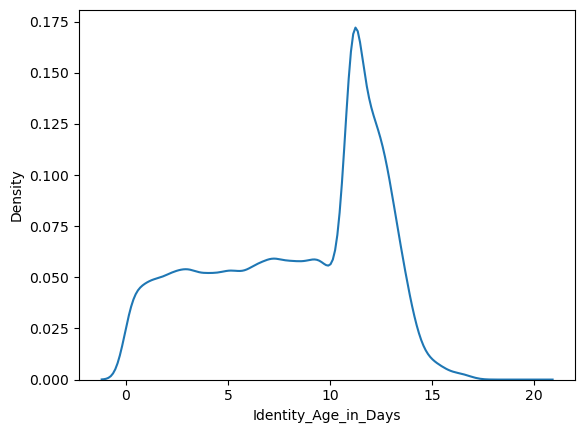

In [66]:
# Drop irrelevant columns 

df.drop(["Patron_Constant_Correspondence_Marker","Customer_Vocation","Enlistment_Period_in_Days"],axis=1,inplace=True)

df["Identity_Age_in_Days"]=df["Identity_Age_in_Days"]/365

sns.kdeplot(df["Identity_Age_in_Days"])

In [67]:
df.isnull().sum()

ID                                  0
Patron_Salary                       0
Automobile_Possession               0
Ongoing_Borrowing                   0
Residence_Proprietorship            0
Offspring_Number                    0
Loan_Capital                        0
Borrowing_Periodic_Payment          0
Customer_Revenue_Category           0
Patron_Academic_Qualification       0
Patron_Sex                          0
Customer_Living_Arrangement         0
Population_Fraction_by_Region       0
Patron_age                          0
Work_Duration_in_Days               0
Identity_Age_in_Days               17
Cellphone_Marker                    0
Employment_Phone_Operation          0
Customer_Urban_Area_Ranking         0
Rating_Origin_1                     0
Rating_Origin_2                     0
Rating_Origin_3                     0
Community_Non-Payment_Incidence     0
Telecommunication_Switch            0
Default                             0
dtype: int64

In [68]:
# Replacing nulls in the column :

df["Identity_Age_in_Days"].fillna(df["Identity_Age_in_Days"].mean(),inplace=True)

In [69]:

# Performing VIF to check multi colinearity in the independent numeric columns as a feature selection technique
#in below cells I am dropping the high VIF coslumns and running VIF again n again

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
15,Cellphone_Marker,74.957409
12,Patron_age,22.147762
17,Customer_Urban_Area_Ranking,19.099746
18,Rating_Origin_1,17.013364
20,Rating_Origin_3,10.549905
6,Borrowing_Periodic_Payment,9.357222
5,Loan_Capital,6.994270
7,Customer_Revenue_Category,6.304301
14,Identity_Age_in_Days,5.672634
10,Customer_Living_Arrangement,4.737670


In [70]:
df.drop("Cellphone_Marker",axis=1,inplace=True)

In [71]:
# Assuming 'ID' is a column to be excluded
X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
12,Patron_age,21.187097
17,Rating_Origin_1,15.795374
16,Customer_Urban_Area_Ranking,13.290617
19,Rating_Origin_3,9.825769
6,Borrowing_Periodic_Payment,9.195673
5,Loan_Capital,6.992255
7,Customer_Revenue_Category,6.009038
14,Identity_Age_in_Days,5.629789
10,Customer_Living_Arrangement,4.478608
8,Patron_Academic_Qualification,4.114273


In [72]:
df.drop("Patron_age",axis=1,inplace=True)

In [73]:
X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
16,Rating_Origin_1,13.538323
15,Customer_Urban_Area_Ranking,12.997865
18,Rating_Origin_3,9.542908
6,Borrowing_Periodic_Payment,9.193913
5,Loan_Capital,6.964230
7,Customer_Revenue_Category,5.953792
13,Identity_Age_in_Days,5.189547
10,Customer_Living_Arrangement,4.446040
8,Patron_Academic_Qualification,3.937346
0,Patron_Salary,3.857122


In [74]:
df.drop("Rating_Origin_1",axis=1,inplace=True)

In [75]:
X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
15,Customer_Urban_Area_Ranking,12.503238
6,Borrowing_Periodic_Payment,9.172535
17,Rating_Origin_3,9.116455
5,Loan_Capital,6.941904
7,Customer_Revenue_Category,5.911720
13,Identity_Age_in_Days,5.091426
10,Customer_Living_Arrangement,4.401099
8,Patron_Academic_Qualification,3.934977
0,Patron_Salary,3.791593
3,Residence_Proprietorship,3.249339


In [76]:
df.drop("Customer_Urban_Area_Ranking",axis=1,inplace=True)

In [77]:
X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
6,Borrowing_Periodic_Payment,9.150412
16,Rating_Origin_3,8.563941
5,Loan_Capital,6.941227
7,Customer_Revenue_Category,5.339539
13,Identity_Age_in_Days,4.976685
10,Customer_Living_Arrangement,4.286408
8,Patron_Academic_Qualification,3.791259
0,Patron_Salary,3.785344
3,Residence_Proprietorship,3.191806
9,Patron_Sex,3.132647


In [78]:
df.drop("Borrowing_Periodic_Payment",axis=1,inplace=True)

In [79]:
X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
15,Rating_Origin_3,8.508207
6,Customer_Revenue_Category,5.335801
12,Identity_Age_in_Days,4.974637
9,Customer_Living_Arrangement,4.275540
7,Patron_Academic_Qualification,3.790986
5,Loan_Capital,3.653753
0,Patron_Salary,3.556602
3,Residence_Proprietorship,3.176929
8,Patron_Sex,3.132578
16,Community_Non-Payment_Incidence,2.703735


In [80]:
df.drop("Rating_Origin_3",axis=1,inplace=True)

In [81]:
X = df.drop(columns=['Default', 'ID'])  # Exclude 'ID' from the predictor variables

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
vif_data

vif_data.sort_values(by='VIF',ascending=False)

,Variable,VIF
6,Customer_Revenue_Category,5.156746
12,Identity_Age_in_Days,4.705009
9,Customer_Living_Arrangement,4.173833
7,Patron_Academic_Qualification,3.683174
5,Loan_Capital,3.596587
0,Patron_Salary,3.544130
3,Residence_Proprietorship,3.109429
8,Patron_Sex,3.071394
15,Community_Non-Payment_Incidence,2.671950
16,Telecommunication_Switch,2.442568


In [82]:
df

,ID,Patron_Salary,Automobile_Possession,Ongoing_Borrowing,Residence_Proprietorship,Offspring_Number,Loan_Capital,Customer_Revenue_Category,Patron_Academic_Qualification,Patron_Sex,Customer_Living_Arrangement,Population_Fraction_by_Region,Work_Duration_in_Days,Identity_Age_in_Days,Employment_Phone_Operation,Rating_Origin_2,Community_Non-Payment_Incidence,Telecommunication_Switch,Default
0,12142509,6750.0,0.0,1.000000,0.00000,0.0,61190.55,1,4,1,1,0.028663,1062.0,1.049315,0,0.478787,0.0186,63.000000,0
1,12138936,20250.0,1.0,1.000000,0.69206,0.0,15282.00,5,0,1,1,0.008575,4129.0,0.057534,1,0.215068,0.0887,962.106056,0
2,12181264,18000.0,0.0,1.000000,0.00000,1.0,59527.35,5,1,1,0,0.022800,5102.0,0.906849,0,0.552795,0.0742,277.000000,0
3,12188929,15750.0,0.0,1.000000,1.00000,0.0,53870.40,4,4,1,1,0.010556,1649.0,2.123288,0,0.135182,0.0887,1700.000000,0
4,12133385,33750.0,1.0,1.000000,0.00000,2.0,133988.40,1,4,0,1,0.020713,2977.0,11.076712,0,0.301182,0.2021,674.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.499175,1.00000,0.0,107820.00,5,4,0,1,0.031329,2863.0,8.063014,0,0.173527,0.0577,0.000000,1
121852,12173765,15750.0,0.0,1.000000,0.00000,0.0,104256.00,1,0,0,1,0.018209,636.0,3.312329,0,0.371559,0.0825,4.000000,0
121853,12103937,8100.0,0.0,0.000000,1.00000,1.0,55107.90,2,4,1,1,0.008068,1623.0,0.967123,0,0.048079,0.0887,0.000000,0
121854,12170623,38250.0,1.0,0.000000,1.00000,0.0,45000.00,5,0,0,1,0.028663,847.0,7.950685,0,0.103538,0.0979,0.000000,0


# Model Building

In [83]:
# Preparing training and testing data

from sklearn.model_selection import train_test_split
# removing id also in model as it is identifier only 
x = df.iloc[:,1:-1]
y = df["Default"]

In [84]:
# Splitiing train and test data

from sklearn.model_selection import train_test_split
x = df.drop(["ID","Default"],axis = 1)
y = df["Default"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)



In [85]:
# Scaling the data to ignore the dominance of particular feature : 

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


In [86]:
# Training the model and predicting the X test Values

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
x_pred = logmodel.predict(x_test)

In [87]:
# Evaluating the logistic model 

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score = accuracy_score(x_pred,y_test)
confusion_matrix = confusion_matrix(x_pred,y_test)
classification_report = classification_report(x_pred,y_test)

print("Accuracy is ")
print(accuracy_score)
print("Confusion Matrix:")
print(confusion_matrix)
print()
print("Classification report is :")
print(classification_report)

Accuracy is 
0.9201854815544339
Confusion Matrix:
[[22424  1945]
 [    0     0]]

Classification report is :
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     24369
           1       0.00      0.00      0.00         0

    accuracy                           0.92     24369
   macro avg       0.50      0.46      0.48     24369
weighted avg       1.00      0.92      0.96     24369



C:\Users\91945\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91945\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91945\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### As we can see from the Classification report F1 score is completely biased due to Imabalanced data in favour of class 0  in below cells we will work on techniques using which we can overcome the problem of Imabalanced data

In [88]:
# undersampling - In this we will reduce the size of majority class to count of minority class 


# Class count
count_class_0, count_class_1 = df.Default.value_counts()

# Divide by class
df_class_0 = df[df['Default'] == 0]
df_class_1 = df[df['Default'] == 1]

In [89]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Default.value_counts())

Random under-sampling:
Default
0    9842
1    9842
Name: count, dtype: int64


In [90]:
X = df_test_under.drop(['Default',"ID"],axis='columns')
y = df_test_under['Default']

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
x_pred = logmodel.predict(X_test)


cr = classification_report(x_pred,y_test)

print(cr)

# Again clearly visible we are not getting desired results

              precision    recall  f1-score   support

           0       0.67      0.54      0.59      2461
           1       0.42      0.55      0.47      1476

    accuracy                           0.54      3937
   macro avg       0.54      0.54      0.53      3937
weighted avg       0.57      0.54      0.55      3937



In [91]:
# oversampling - In this we will reduce the size of minority class to count of majority class

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Default.value_counts())

Random over-sampling:
Default
0    112001
1    112001
Name: count, dtype: int64


In [92]:
# Training and prediciting using model

X = df_test_over.drop(['Default',"ID"],axis='columns')
y = df_test_over['Default']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
x_pred = logmodel.predict(X_test)


cr = classification_report(x_pred,y_test)

print(cr)

# still same kind of result 

              precision    recall  f1-score   support

           0       0.71      0.53      0.61     29991
           1       0.37      0.57      0.45     14810

    accuracy                           0.54     44801
   macro avg       0.54      0.55      0.53     44801
weighted avg       0.60      0.54      0.56     44801



In [93]:
# Now we will work with SMOTE method to produce synthetic samples to match the size of both classes


from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(['Default',"ID"],axis='columns')
y = df['Default']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)  # Use fit_resample instead of fit_sample

# Convert y_sm to a pandas Series to use value_counts
y_sm_series = pd.Series(y_sm)

# Get the value counts of the resampled target variable
y_sm_value_counts = y_sm_series.value_counts()

print(y_sm_value_counts)


Default
0    112001
1    112001
Name: count, dtype: int64


In [94]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
x_pred = logmodel.predict(X_test)


cr = classification_report(x_pred,y_test)

print(cr)

# Overall accuracy is still not reduced 

              precision    recall  f1-score   support

           0       0.69      0.53      0.60     29087
           1       0.39      0.56      0.46     15714

    accuracy                           0.54     44801
   macro avg       0.54      0.55      0.53     44801
weighted avg       0.59      0.54      0.55     44801



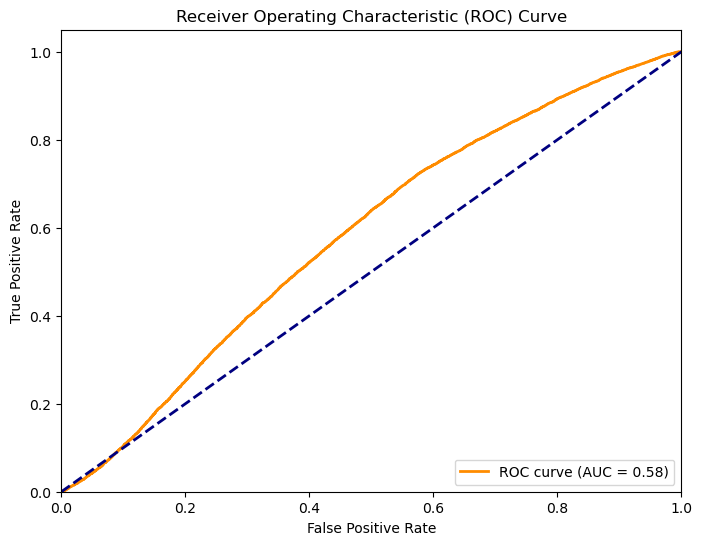

In [95]:
# also checking with AUC ROC curve 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Train your binary classification model (e.g., logistic regression, random forest, etc.) on the training set

# Make predictions on the test set
y_pred = logmodel.predict_proba(X_test)[:, 1]  # Use the predicted probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### As we can see no clear progress in case of Logistic regression even by using all measures we will move to Decision tree alorithm

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(['Default',"ID"],axis='columns')
y = df['Default']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)


dtreemod = DecisionTreeClassifier()
dtreemod.fit(X_train,y_train)
x_pred = logmodel.predict(X_test)


cr = classification_report(x_pred,y_test)

print(cr)


              precision    recall  f1-score   support

           0       0.70      0.93      0.80     16860
           1       0.39      0.10      0.16      7509

    accuracy                           0.68     24369
   macro avg       0.55      0.52      0.48     24369
weighted avg       0.61      0.68      0.60     24369



In [97]:
# Undersampling using dtree


# Class count
count_class_0, count_class_1 = df.Default.value_counts()

# Divide by class
df_class_0 = df[df['Default'] == 0]
df_class_1 = df[df['Default'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Default.value_counts())

X = df_test_under.drop(['Default',"ID"],axis='columns')
y = df_test_under['Default']

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtreemod = DecisionTreeClassifier()
dtreemod.fit(X_train,y_train)
x_pred = logmodel.predict(X_test)

cr = classification_report(x_pred,y_test)

print(cr)

Random under-sampling:
Default
0    9842
1    9842
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.69      0.53      0.60      2567
           1       0.39      0.55      0.45      1370

    accuracy                           0.54      3937
   macro avg       0.54      0.54      0.53      3937
weighted avg       0.58      0.54      0.55      3937



In [98]:
# Using dtree OVersampling 

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Default.value_counts())


X = df_test_over.drop(['Default',"ID"],axis='columns')
y = df_test_over['Default']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtreemod = DecisionTreeClassifier()
dtreemod.fit(X_train,y_train)
x_pred = logmodel.predict(X_test)


cr = classification_report(x_pred,y_test)

print(cr)


Random over-sampling:
Default
0    112001
1    112001
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.69      0.53      0.60     28877
           1       0.40      0.57      0.47     15924

    accuracy                           0.55     44801
   macro avg       0.55      0.55      0.54     44801
weighted avg       0.59      0.55      0.56     44801



### As stated above using Dtree with undersmapling , oversmapling also didn't work as excpected , lastly we will go with Dtree and Random Forest with SMOTE

In [99]:
# Smote using Dtree

from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(['Default',"ID"],axis='columns')
y = df['Default']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)  # Use fit_resample instead of fit_sample

# Convert y_sm to a pandas Series to use value_counts
y_sm_series = pd.Series(y_sm)

# Get the value counts of the resampled target variable
y_sm_value_counts = y_sm_series.value_counts()

print(y_sm_value_counts)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

dtreemod = DecisionTreeClassifier()
dtreemod.fit(X_train,y_train)
x_pred = dtreemod.predict(X_test)

cr = classification_report(x_pred,y_test)

ac = accuracy_score(x_pred,y_test)

print("Dtree Classificaton report")
print(cr)
print()
print("Dtree Accuracy")
print(ac)

rfmod = RandomForestClassifier()
rfmod.fit(X_train,y_train)
x_pred = rfmod.predict(X_test)

rfcr = classification_report(x_pred,y_test)

rfac = accuracy_score(x_pred,y_test)


print("Random Forest Classification report")
print(rfcr)
print()
print("Random Forest Accuracy")
print(rfac)


Default
0    112001
1    112001
Name: count, dtype: int64
Dtree Classificaton report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     21854
           1       0.92      0.90      0.91     22947

    accuracy                           0.91     44801
   macro avg       0.91      0.91      0.91     44801
weighted avg       0.91      0.91      0.91     44801


Dtree Accuracy
0.9092654181826298
Random Forest Classification report
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     23998
           1       0.92      0.99      0.95     20803

    accuracy                           0.96     44801
   macro avg       0.96      0.96      0.96     44801
weighted avg       0.96      0.96      0.96     44801


Random Forest Accuracy
0.9552018928148925


## Clealry Visible Random forest is the winner here as It has the highest Accuracy of 96% as well as F1 score for  both the class are also 96% which means the the model is completely unbiased when it comes to class wise prediction 

# Conclusion

Default
0    112001
1    112001
Name: count, dtype: int64


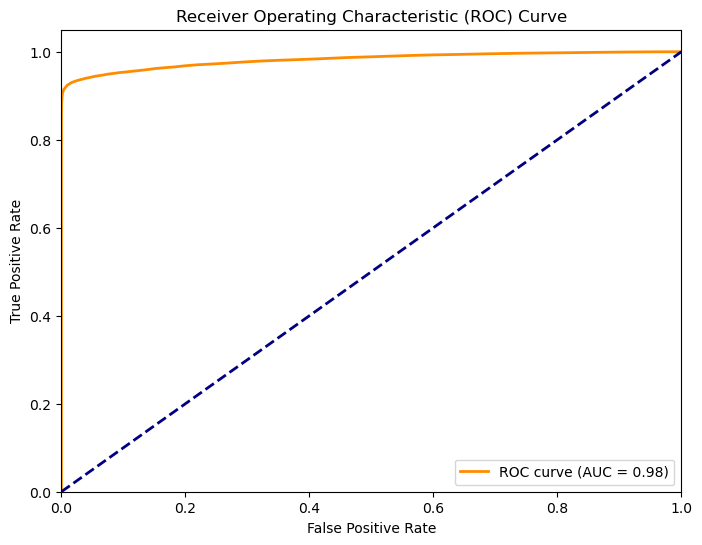

In [102]:
# also checking with AUC ROC curve 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(['Default',"ID"],axis='columns')
y = df['Default']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)  # Use fit_resample instead of fit_sample

# Convert y_sm to a pandas Series to use value_counts
y_sm_series = pd.Series(y_sm)

# Get the value counts of the resampled target variable
y_sm_value_counts = y_sm_series.value_counts()

print(y_sm_value_counts)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

rfmod = RandomForestClassifier()
rfmod.fit(X_train,y_train)
x_pred = rfmod.predict(X_test)

cr = classification_report(x_pred,y_test)

ac = accuracy_score(x_pred,y_test)




# Make predictions on the test set
y_pred = rfmod.predict_proba(X_test)[:, 1]  # Use the predicted probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [100]:
# While working with complex and imbalanced data Logistic regression will not always give best results as accuracy can be illusion in 
# imabalanced data set due to class domination ,

# However models like Dtree and RF which works on Splitiing values based on Information and entropy are handy in these situations.

## References:

In [101]:
# 1- My previous project on Logistic regression (Heart disease prediction)
# 2 - Lecture by YT channel Code basics on the topic of Imabalanced dataset
# 3 - CHatgPT